In [96]:
import pandas as pd
import numpy as np


In [97]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [98]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5374,ham,Do u konw waht is rael FRIENDSHIP Im gving yuo...,NaN,NaN,NaN
3220,spam,"Thanks for your ringtone order, reference numb...",NaN,NaN,NaN
2744,ham,"Tick, tick, tick ... Babe",NaN,NaN,NaN
3933,ham,How come guoyang go n tell her? Then u told her?,NaN,NaN,NaN
3353,ham,R u sure they'll understand that! Wine * good ...,NaN,NaN,NaN


In [99]:
df.shape

(5572, 5)

In [100]:
# Steps
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deployment

# 1. Data cleaning

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [102]:
# drop last three column
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [103]:
# renaming the columns
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
df.sample(5)

,target,text
5207,ham,"Babe, I'm answering you, can't you see me ? Ma..."
78,ham,Does not operate after &lt;#&gt; or what
5407,ham,Yup he msg me: is tat yijue? Then i tot it's m...
1817,ham,Well i will watch shrek in 3D!!B)
353,ham,Yo you guys ever figure out how much we need f...


In [104]:
# label encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()



In [105]:
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [106]:
# check missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [107]:
# check duplicaates values
df.duplicated().sum()

403

In [108]:
# drop duplicates
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [109]:
df.shape

(5169, 2)

# 2. EDA

In [110]:
# EDA
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

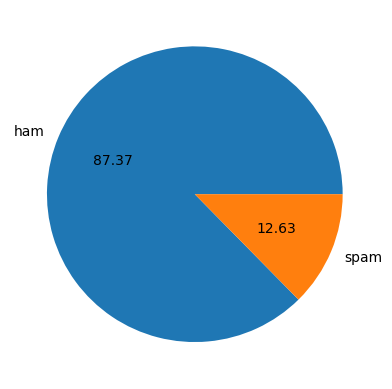

In [111]:
# import matplotlib for  ploting charts
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [112]:
# note :- Data is Imbalanced

In [113]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rishu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [114]:
df['num_characters'] = df['text'].apply(len)
df

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [115]:
df['num_words'] = df['text'].apply(len)
df


,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,111
1,0,Ok lar... Joking wif u oni...,29,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,155
3,0,U dun say so early hor... U c already then say...,49,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61,61
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,161
5568,0,Will Ì_ b going to esplanade fr home?,37,37
5569,0,"Pity, * was in mood for that. So...any other s...",57,57
5570,0,The guy did some bitching but I acted like i'd...,125,125


In [116]:
# num of words
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [117]:
df.head(1)

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,111,24


In [118]:
# ham
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,70.459256,17.123782
std,56.358207,56.358207,13.493970
min,2.000000,2.000000,1.000000
25%,34.000000,34.000000,8.000000
50%,52.000000,52.000000,13.000000
75%,90.000000,90.000000,22.000000
max,910.000000,910.000000,220.000000


In [119]:
# ham
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,137.891271,27.667688
std,30.137753,30.137753,7.008418
min,13.000000,13.000000,2.000000
25%,132.000000,132.000000,25.000000
50%,149.000000,149.000000,29.000000
75%,157.000000,157.000000,32.000000
max,224.000000,224.000000,46.000000


<Axes: xlabel='num_characters', ylabel='Count'>

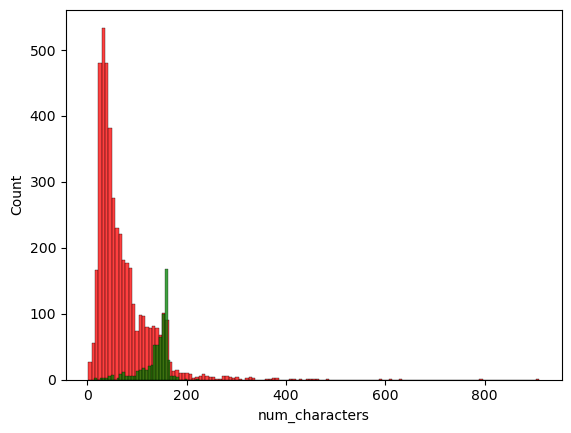

In [120]:
# plto histogram
import seaborn as sns

sns.histplot(df[df['target'] == 0]['num_characters'],color='red')
sns.histplot(df[df['target'] == 1]['num_characters'], color='green')

c:\Users\Rishu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


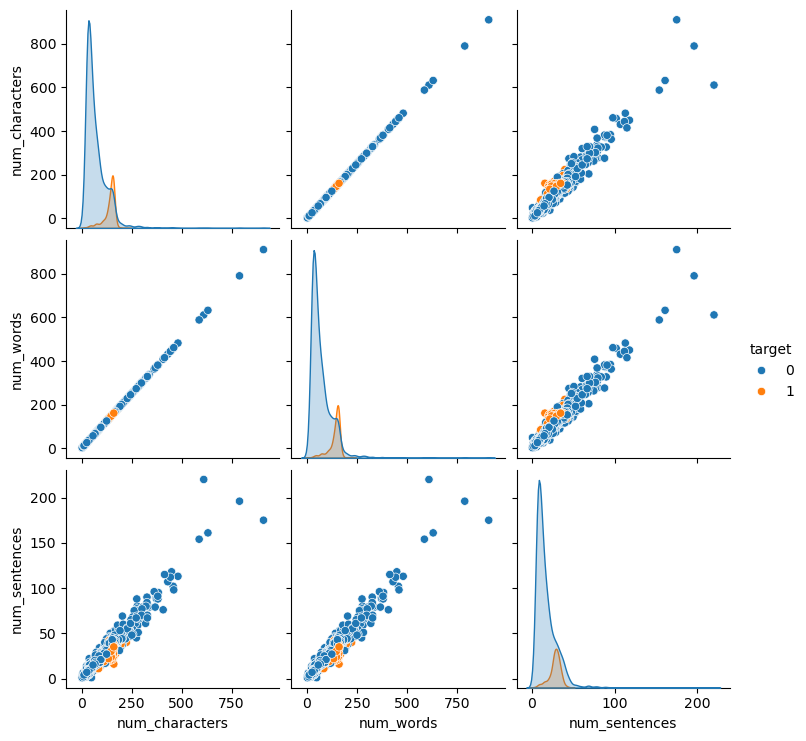

In [121]:
# correlation coefficient
sns.pairplot(df,hue='target')

# 3 . Data preprocessing

* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuation
* Stemming 


In [122]:
import pstats
import string
from wordcloud import STOPWORDS


def transform_text(text):
    # lower case
    text = text.lower()
    # tokenization
    text = nltk.word_tokenize(text)
    # remove special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()

    for i in text:
        if i not in STOPWORDS and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()

    for i in text:

        
        y.append(ps.stem(i))

    return y


In [123]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")


['gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'cri',
 'enough',
 'today']

In [124]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [125]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,111,24,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,Ok lar... Joking wif u oni...,29,29,8,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,155,37,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,49,13,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,61,15,"[nah, think, goe, usf, live, around, though]"


In [126]:
# word cloud module
from wordcloud import WordCloud

# Generate word cloud
wc = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = STOPWORDS, 
                min_font_size = 10)



In [127]:
# Ensure all data in 'transformed_text' is string, replacing NaN with '' (empty string)
df['transformed_text'] = df['transformed_text'].fillna('').astype(str)

# Now concatenate the strings for rows where 'target' == 1
spam_text = df[df['target'] == 1]['transformed_text'].str.cat(sep=" ")

# Generate the word cloud for spam texts
spam_wc = wc.generate(spam_text)

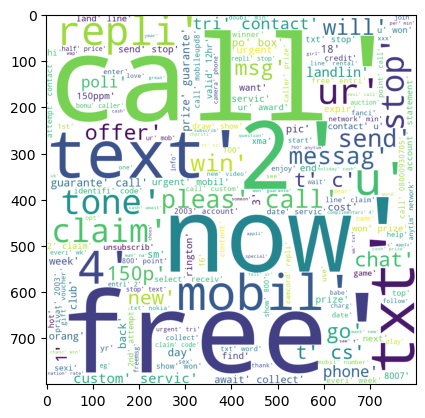

In [128]:
plt.imshow(spam_wc)

In [129]:
df['transformed_text'] = df['transformed_text'].fillna('').astype(str)

# Now concatenate the strings for rows where 'target' == 0
ham_text = df[df['target'] == 0]['transformed_text'].str.cat(sep=" ")

# Generate the word cloud for spam texts
ham_wc = wc.generate(ham_text)

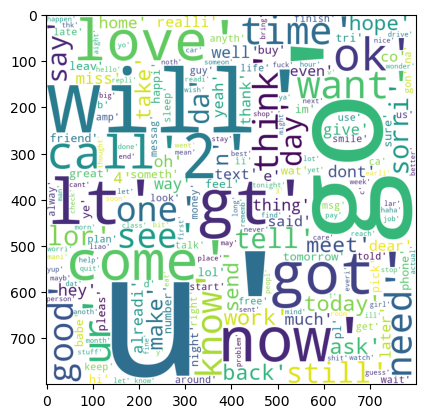

In [130]:
plt.imshow(ham_wc)


In [131]:
spam_cor = []

for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_cor.append(word)
len(spam_cor)

10133

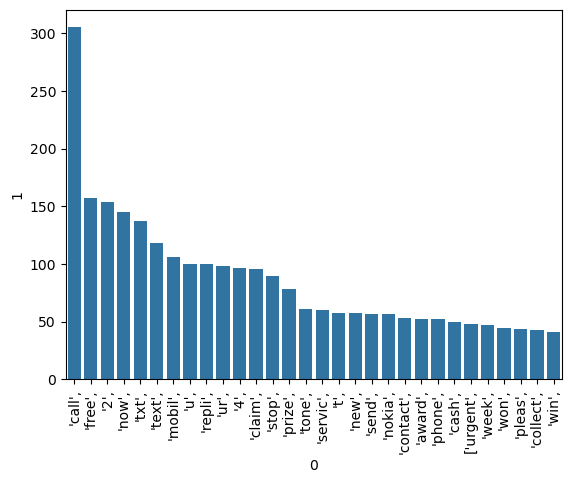

In [132]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_cor).most_common(30))[0],y=pd.DataFrame(Counter(spam_cor).most_common(30))[1])
# pd.DataFrame(Counter(spam_cor).most_common(30))
plt.xticks(rotation='vertical')
plt.show()

In [133]:
ham_cor = []

for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_cor.append(word)
len(ham_cor)

35123

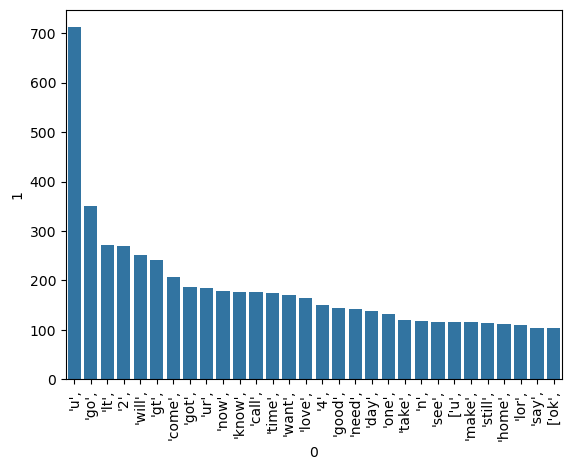

In [134]:
sns.barplot(x=pd.DataFrame(Counter(ham_cor).most_common(30))[0],y=pd.DataFrame(Counter(ham_cor).most_common(30))[1])
# pd.DataFrame(Counter(spam_cor).most_common(30))
plt.xticks(rotation='vertical')
plt.show()

# 4. Model Building

In [135]:
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer
cv = CountVectorizer()
tfidf = CountVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 3000)

In [136]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [137]:
y = df['target'].values

In [138]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [139]:
# Naive bayes algorith
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [140]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(precision_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))


0.8733075435203095
0.5368852459016393
[[772 113]
 [ 18 131]]


In [141]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(precision_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

0.9796905222437138
0.9383561643835616
[[876   9]
 [ 12 137]]


In [142]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(precision_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))

0.9748549323017408
1.0
[[885   0]
 [ 26 123]]


In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier 

In [144]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [145]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [146]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [147]:
from sklearn.metrics import precision_score, accuracy_score

accuracy_score_list = []
precision_score_list = []

for name , clf , in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_score_list.append(current_accuracy)
    precision_score_list.append(current_precision)

For  SVC
Accuracy -  0.9148936170212766
Precision -  0.7479674796747967
For  KN
Accuracy -  0.9110251450676983
Precision -  1.0
For  NB
Accuracy -  0.9796905222437138
Precision -  0.9383561643835616
For  DT
Accuracy -  0.9264990328820116
Precision -  0.9506172839506173
For  LR
Accuracy -  0.9748549323017408
Precision -  0.9694656488549618
For  RF
Accuracy -  0.9758220502901354
Precision -  1.0
For  AdaBoost
Accuracy -  0.971953578336557
Precision -  0.9477611940298507
For  BgC
Accuracy -  0.9690522243713733
Precision -  0.9534883720930233
For  ETC
Accuracy -  0.9729206963249516
Precision -  0.984
For  GBDT
Accuracy -  0.9506769825918762
Precision -  0.9711538461538461
For  xgb
Accuracy -  0.971953578336557
Precision -  0.9918032786885246


In [148]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_score_list,'Precision':precision_score_list}).sort_values('Precision',ascending=False)

In [149]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.911025,1.000000
5,RF,0.975822,1.000000
10,xgb,0.971954,0.991803
8,ETC,0.972921,0.984000
9,GBDT,0.950677,0.971154
4,LR,0.974855,0.969466
7,BgC,0.969052,0.953488
3,DT,0.926499,0.950617
6,AdaBoost,0.971954,0.947761
2,NB,0.979691,0.938356


In [150]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [151]:
# voting classifier
from sklearn.ensemble import VotingClassifier

# Create a Voting Classifier with the defined classifiers in 'clfs'
voting_clf = VotingClassifier(estimators=list(clfs.items()))

# Train the voting classifier
voting_clf.fit(X_train, y_train)

# Predict using the voting classifier
y_pred_voting = voting_clf.predict(X_test)

# Calculate accuracy and precision for the voting classifier
accuracy_voting = accuracy_score(y_test, y_pred_voting)
precision_voting = precision_score(y_test, y_pred_voting)

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))